# **🔭 OpenCV Functions**

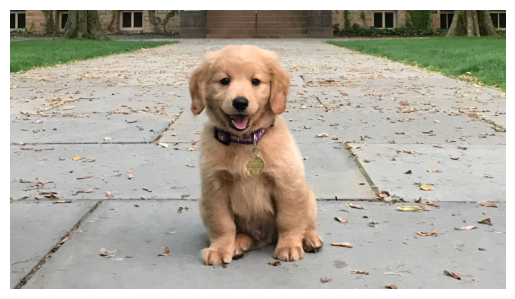

In [50]:
import cv2
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

img_path = '/content/dog.jpg'
width, height = 1400, 800

# Load an image from file using OpenCV
# imgARR = imread(img_path) # Array representation
original_img = cv2.imread(img_path)
original_img_rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
original_img = cv2.resize(original_img, (width, height))

normalized_img = original_img / 255.0

# Display the gray-scaled image
plt.imshow(original_img_rgb)
plt.axis('off')  # Hide the axis
plt.show()

**Blur Filters**

• GaussianBlur

• MedianBlur

• BilateralFilter

In [59]:
blurred_img = cv2.GaussianBlur(original_img_rgb, (5, 5), 0)
# blurred_img = cv2.cvtColor(blurred_img, cv2.COLOR_BGR2RGB)

median_blurred_img = cv2.medianBlur(original_img_rgb, 5)
# median_blurred_img = cv2.cvtColor(median_blurred_img, cv2.COLOR_BGR2RGB)

**Sharpening and Embossing**

In [62]:
sharpening_kernel = np.array([[-1, -1, -1],
                              [-1, 9, -1],
                              [-1, -1, -1]])

sharpened_img = cv2.filter2D(original_img_rgb, -1, sharpening_kernel)

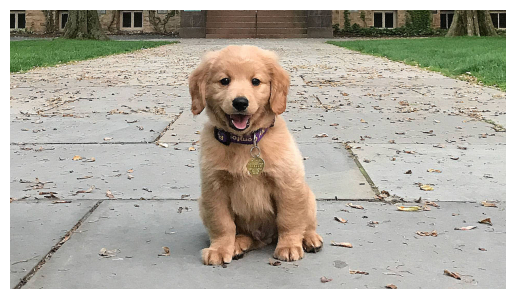

In [63]:
# Display the sharpened image
plt.imshow(sharpened_img)
plt.axis('off')  # Hide the axis
plt.show()

**High Pass Filtering - Edge Detection**

In [64]:
# Apply Canny edge detector
edges = cv2.Canny(original_img_rgb, 100, 200)

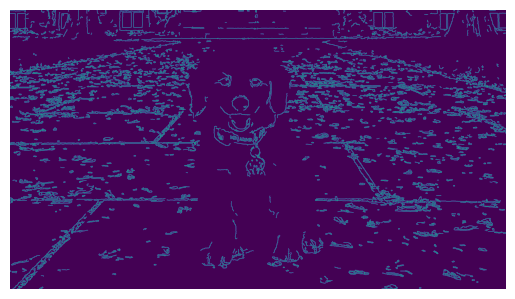

In [65]:
# Display edges
plt.imshow(edges)
plt.axis('off')  # Hide the axis
plt.show()

**Histogram Equalization**

In [71]:
# Convert to grayscale
gray_img = cv2.cvtColor(original_img_rgb, cv2.COLOR_BGR2GRAY)

# Apply Histogram Equalization
equalized_img = cv2.equalizeHist(gray_img)

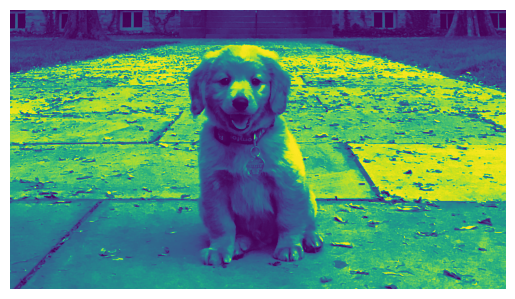

In [72]:
# Display the equalized image
plt.imshow(equalized_img)
plt.axis('off')  # Hide the axis
plt.show()

**Morphological Operations - Erosion and Dilation**

In [73]:
# Apply eroison
kernel = np.ones((5, 5), np.uint8)
eroded_img = cv2.erode(original_img_rgb, kernel, iterations = 1)

# Apply Dilation
dilated_img = cv2.dilate(original_img_rgb, kernel, iterations = 1)

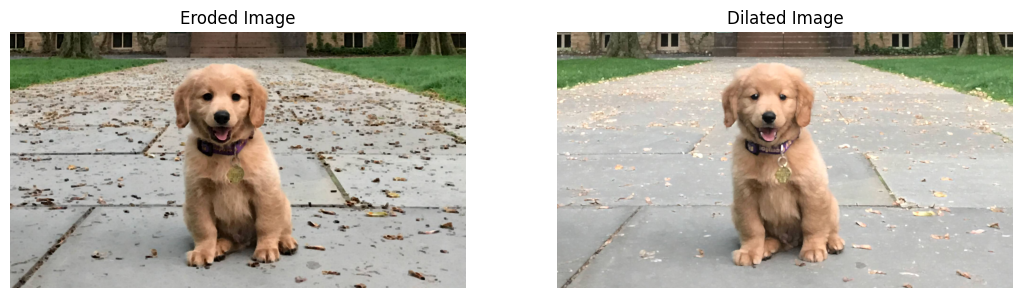

In [77]:
# Display the images
plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.imshow(eroded_img)
plt.title('Eroded Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(dilated_img)
plt.title('Dilated Image')
plt.axis('off')

plt.show()

**Basic Image Arithmetic**

In [78]:
# Image addition
added_img = cv2.add(eroded_img, dilated_img)

# Image subtraction
added_img = cv2.subtract(eroded_img, dilated_img)

**Put One Image on Another Background**

In [96]:
# Convert to HSV
hsv = cv2.cvtColor(original_img, cv2.COLOR_BGR2HSV)

# define range of orange color in HSV
lower_bound_orange = np.array([5, 95, 95])
upper_bound_orange = np.array([35, 255, 255])

In [124]:
# Create a mask
mask = cv2.inRange(hsv, lower_bound_orange, upper_bound_orange)

# Bitwise-AND to extract the region of interest
result = cv2.bitwise_and(original_img_rgb, original_img_rgb, mask = mask)

# # Place ROI on the background
# result = background.copy()
# result[0:roi:shape[0], 0:roi:shape[1]] = roi

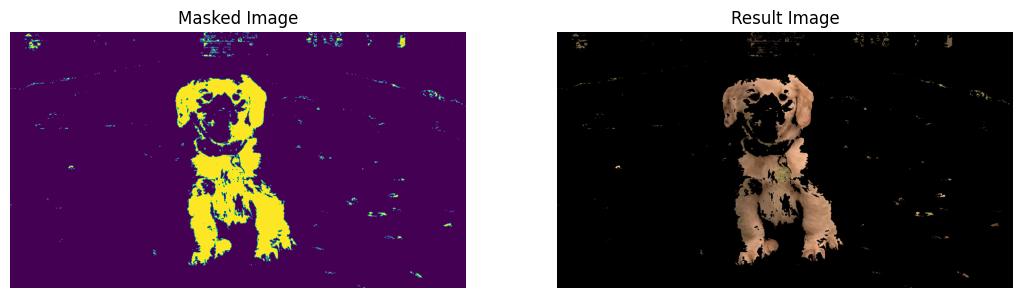

In [125]:
# Display the images
plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.imshow(mask)
plt.title('Masked Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(result)
plt.title('Result Image')
plt.axis('off')

plt.show()

In [122]:
# Create a rectangular region as a mask
box_mask = np.zeros(original_img.shape[:2], np.uint8)
height_start, height_end = 140, 550
width_start, width_end = 700, 1100
box_mask[height_start:height_end, width_start:width_end] = 255

# Copmute the Bitwise-AND
masked_img = cv2.bitwise_and(original_img_rgb, original_img_rgb, mask = box_mask)

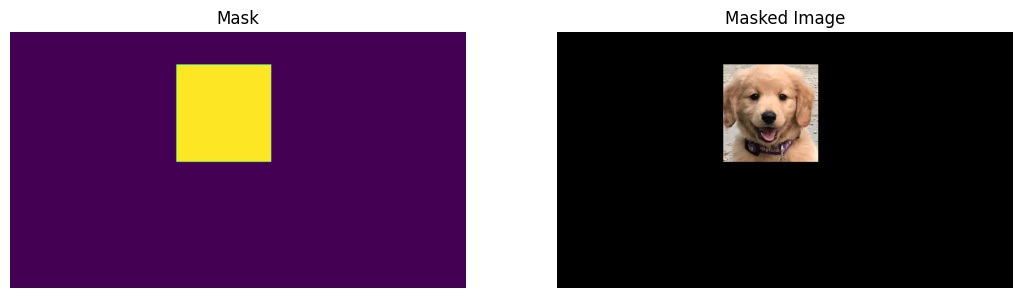

In [123]:
# Display the images
plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.imshow(box_mask)
plt.title('Mask')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(masked_img)
plt.title('Masked Image')
plt.axis('off')

plt.show()

**Background Subtraction and Contours**

• BackgroundSubtractorMOG2

• BackgroundSubtractorKNN


In [127]:
# Create background subtractor
fgbg = cv2.createBackgroundSubtractorMOG2()

# Apply background subtraction
# fgmask = fgbg.apply(video_frame)

In [ ]:
# Convert image to grayscale
gray_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)

# Apply binary threshold
ret, thresh = cv2.threshold(gray_img, 127, 255, 0)

# Find contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Choose the largest contour, or any specific one
contour = max(contours, key = cv2.contourArea)

# Draw contours
contours_img = original_img
cv2.drawContours(contours_img, contours, -1, (0, 255, 0), 3)

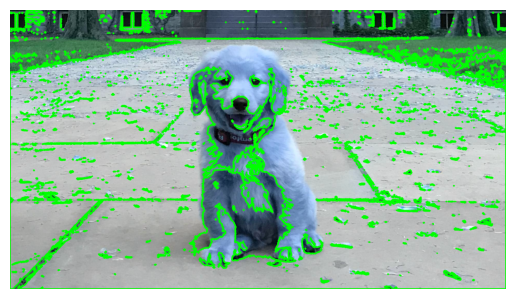

In [145]:
# Display the contours image
plt.imshow(contours_img)
plt.axis('off')  # Hide the axis
plt.show()

**Image Matching Using Hu-Moments and Count of Vertices**

In [148]:
# Calculate Hu-Moments
huMoments = cv2.HuMoments(cv2.moments(contour)).flatten()

# Compare Hu-Moments of different shapes
# match_score = cv2.matchShapes(contour1, contour2, cv2.CONTOURS_MATCH_I1, 0.0)

**Image Grouping Using K-Means Clustering**

In [ ]:
from sklearn.cluster import KMeans

# Reshape image for clustering
pixels = original_img.reshape(-1, 3)

# Apply K-Means clustering
kmeans = KMeans(n_clusters = 3)
kmeans.fit(pixels)

segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(original_img_rgb.shape)

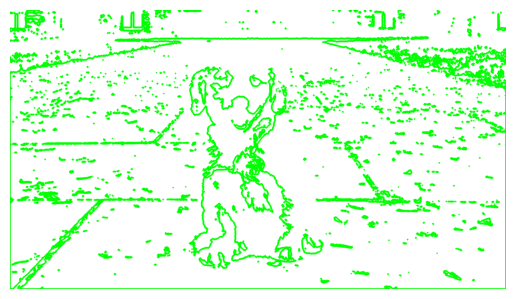

In [150]:
# Display the segmented image
plt.imshow(segmented_img)
plt.axis('off')  # Hide the axis
plt.show()

**Convexity Defect**

In [159]:
# Calculate convex hull
hull = cv2.convexHull(contour, returnPoints = False)

# Find convexity defects
defects = cv2.convexityDefects(contour, hull)

defects_img = original_img

In [160]:
# Draw the defects
if defects is not None:
    for i in range(defects.shape[0]):
        s, e, f, d = defects[i, 0]
        start = tuple(contour[s][0])
        end = tuple(contour[e][0])
        far = tuple(contour[f][0])

        # Draw lines connecting start and end points (convex hull)
        cv2.line(defects_img, start, end, [0, 255, 0], 2)

        # Draw the defect point (far point)
        cv2.circle(defects_img, far, 5, [0, 0, 255], -1)

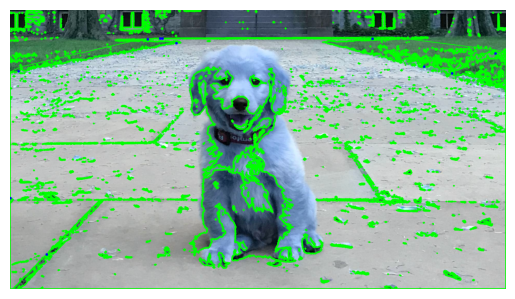

In [161]:
# Display the defects image
plt.imshow(defects_img)
plt.axis('off')  # Hide the axis
plt.show()

# **Sobel Filter**

In [29]:
# Apply Sobel Filter
Gx = np.array([[1.0, 0.0, -1.0], [2.0, 0.0, -2.0], [1.0, 0.0, -1.0]])
Gy = np.array([[1.0, 2.0, 1.0], [0.0, 0.0, 0.0], [-1.0, -2.0, -1.0]])

# we need to know the shape of the input grayscale image
[rows, columns] = np.shape(original_img)
sobel_filtered_image = np.zeros(shape=(rows, columns))

In [33]:
# Now we "sweep" the image in both x and y directions and compute the output
for i in range(rows - 2):
    for j in range(columns - 2):
        gx = np.sum(np.multiply(Gx, original_img[i:i + 3, j:j + 3]))  # x direction
        gy = np.sum(np.multiply(Gy, original_img[i:i + 3, j:j + 3]))  # y direction
        sobel_filtered_image[i + 1, j + 1] = np.sqrt(gx ** 2 + gy ** 2)  # calculate the "hypotenuse"

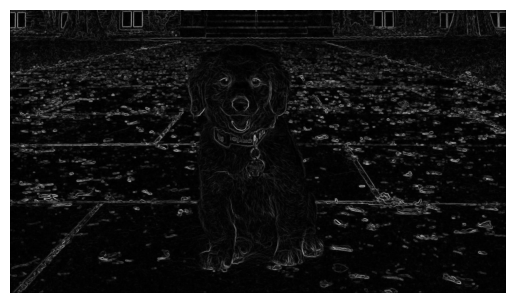

In [34]:
# Display the image after applying sobel filter
plt.imshow(sobel_filtered_image, cmap=plt.get_cmap('gray'))
plt.axis('off')  # Hide the axis
plt.show()